Input Layer: The input layer where you feed your image data.

Convolutional Layers: Initial convolutional layers process the input images to extract low-level features.

Residual Blocks: ResNet50 is characterized by its use of residual blocks. These blocks contain multiple convolutional layers with shortcuts (skip connections) that allow the gradients to flow more efficiently during training, alleviating the vanishing gradient problem.

a. Convolutional Layers: Each residual block typically consists of two or more convolutional layers with BatchNormalization and ReLU activation.

b. Shortcut Connection: The shortcut connection bypasses one or more layers and is added to the output of the convolutional layers. This helps preserve information from earlier layers.

Identity Blocks: These blocks are similar to residual blocks but have no convolutional layers at the shortcut connection.

Global Average Pooling Layer: A global average pooling layer reduces the spatial dimensions of the feature maps to a vector, capturing the global information of the image.

Fully Connected Layer: The output from the global average pooling layer is flattened and fed into a fully connected layer (dense layer) with softmax activation for classification.

Number of images in Demented directory: 3018
Number of images in NonDemented directory: 3200


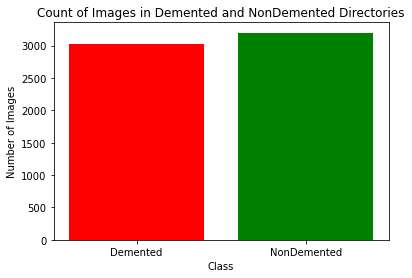

In [1]:
import os
import matplotlib.pyplot as plt

def count_images_in_directory(directory):
    image_count = 0
    for filename in os.listdir(directory):
        if filename.endswith('.jpg') or filename.endswith('.png'):
            image_count += 1
    return image_count

# Example usage:
data_dir =r"/home/lab5/Downloads/combined"
demented_dir = os.path.join(data_dir, 'Demented')
non_demented_dir = os.path.join(data_dir, 'NonDemented')

num_demented_images = count_images_in_directory(demented_dir)
num_non_demented_images = count_images_in_directory(non_demented_dir)

# Print counts
print("Number of images in Demented directory:", num_demented_images)
print("Number of images in NonDemented directory:", num_non_demented_images)

# Plotting
labels = ['Demented', 'NonDemented']
counts = [num_demented_images, num_non_demented_images]

plt.bar(labels, counts, color=['red', 'green'])
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.title('Count of Images in Demented and NonDemented Directories')
plt.show()


In [2]:
import os
import cv2
import numpy as np

def preprocess_image(image_path, target_size):
    # Read the image
    image = cv2.imread(image_path)
    
    # Resize the image
    resized_image = cv2.resize(image, target_size)
    
    # Rescale the image (optional)
    resized_image = resized_image.astype('float32') / 255.0
    
    # Convert image to grayscale
    grayscale_image = cv2.cvtColor(resized_image, cv2.COLOR_BGR2GRAY)
    
    return grayscale_image

def preprocess_directory(directory, target_size):
    preprocessed_images = []
    labels = []
    label = 0 if directory.endswith('NonDemented') else 1  # Assign label based on directory name
    for filename in os.listdir(directory):
        if filename.endswith('.jpg') or filename.endswith('.png'):  # Ensure only image files are processed
            image_path = os.path.join(directory, filename)
            preprocessed_image = preprocess_image(image_path, target_size)
            preprocessed_images.append(preprocessed_image)
            labels.append(label)
    return preprocessed_images, labels

# Example usage:
target_size = (224,224)  # Specify your desired target size

demented_dir = os.path.join(data_dir, 'Demented')
non_demented_dir = os.path.join(data_dir, 'NonDemented')


preprocessed_demented_images, demented_labels = preprocess_directory(demented_dir, target_size)
preprocessed_non_demented_images, non_demented_labels = preprocess_directory(non_demented_dir, target_size)

# Combine the data from both directories
images = preprocessed_demented_images + preprocessed_non_demented_images
labels = demented_labels + non_demented_labels

# Now, all_images contains preprocessed image data and all_labels contains corresponding labels.
images = np.array(images)
labels = np.array(labels)



In [3]:
from sklearn.model_selection import train_test_split
# Separate data for Normal and Tuberculosis classes
# nonDemented_images = images[labels == 0][:3000]
# Demented_images = images[labels == 1][:3000]
# nonDemented_labels = labels[labels == 0][:3000]
# Demented_labels = labels[labels == 1][:3000]

# Concatenate the data back together
# images = np.concatenate([nonDemented_images, Demented_images])
# labels = np.concatenate([nonDemented_labels, Demented_labels])
# # Split the balanced dataset into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)


# Split the data into training and testing sets
X_train_full, X_test, y_train_full, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

# Split the training data into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, test_size=0.1, random_state=42)



#print the balanced data
print("Balanced Images:",images.shape)
print("Balanced labels:",labels.shape)

#print the data seperately of each class
# print("nonDemented_images:",nonDemented_images.shape)
# print("Demented_images:",Demented_images.shape)


# Print the shapes of the training and testing sets
print("X_train shape:", X_train.shape)
print("X_valid shape:", X_valid.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)
print("y_valid shape:", y_valid.shape)

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Balanced Images: (6218, 224, 224)
Balanced labels: (6218,)
X_train shape: (4476, 224, 224)
X_valid shape: (498, 224, 224)
X_test shape: (1244, 224, 224)
y_train shape: (4476,)
y_test shape: (1244,)
y_valid shape: (498,)


# Base Model

2024-03-25 15:08:07.266959: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-03-25 15:08:07.267727: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-25 15:08:07.306744: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-25 15:08:07.511401: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-03-25 15:08:08.019152: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warnin

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 150, 150,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 156, 156,  │          0 │ input_layer[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 75, 75,    │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 75, 75,    │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 75, 75,    │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 77, 77,    │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 38, 38,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 38, 38,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 38, 38,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 38, 38,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 38, 38,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 38, 38,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 38, 38,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 38, 38,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 38, 38,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 38, 38,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 38, 38,    │      1,024 │ conv2_block1_3_c

 Total params: 23,589,761 (89.99 MB)

 Trainable params: 23,536,641 (89.79 MB)

 Non-trainable params: 53,120 (207.50 KB)

Epoch 1/75
140/140 ━━━━━━━━━━━━━━━━━━━━ 165s 1s/step - accuracy: 0.6484 - loss: 0.8106 - val_accuracy: 0.5181 - val_loss: 21.1760
Epoch 2/75
140/140 ━━━━━━━━━━━━━━━━━━━━ 157s 1s/step - accuracy: 0.8680 - loss: 0.3152 - val_accuracy: 0.5181 - val_loss: 0.7147
Epoch 3/75
140/140 ━━━━━━━━━━━━━━━━━━━━ 155s 1s/step - accuracy: 0.9387 - loss: 0.1641 - val_accuracy: 0.5181 - val_loss: 0.9776
Epoch 4/75
140/140 ━━━━━━━━━━━━━━━━━━━━ 155s 1s/step - accuracy: 0.9669 - loss: 0.0950 - val_accuracy: 0.5181 - val_loss: 0.7068
Epoch 5/75
140/140 ━━━━━━━━━━━━━━━━━━━━ 154s 1s/step - accuracy: 0.9672 - loss: 0.0910 - val_accuracy: 0.5181 - val_loss: 5.3075
Epoch 6/75
140/140 ━━━━━━━━━━━━━━━━━━━━ 154s 1s/step - accuracy: 0.9675 - loss: 0.0892 - val_accuracy: 0.5201 - val_loss: 4.0936
Epoch 7/75
140/140 ━━━━━━━━━━━━━━━━━━━━ 153s 1s/step - accuracy: 0.9936 - loss: 0.0209 - val_accuracy: 0.7510 - val_loss: 0.8909
Epoch 7: early stopping
Restoring model weights from the end of the best epoch: 4.
39/39 ━━━━━━━

/home/lab5/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


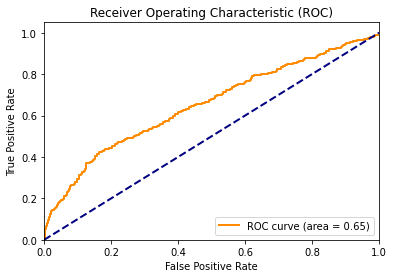

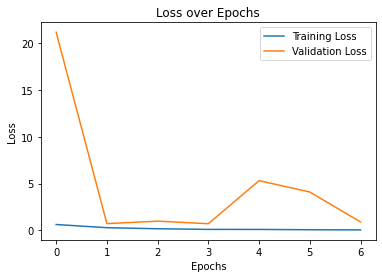

Accuracy: 0.49356913183279744
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
Confusion Matrix:
[[614   0]
 [630   0]]
Cohen's Kappa: 0.0
Matthews Correlation Coefficient: nan
Balanced Accuracy: 0.5
True Positives: 0
True Negatives: 614
False Positives: 0
False Negatives: 630


/tmp/ipykernel_4526/2212205269.py:107: RuntimeWarning: invalid value encountered in scalar divide
  mcc = (tp * tn - fp * fn) / np.sqrt((tp + fp) * (tp + fn) * (tn + fp) * (tn + fn))


39/39 ━━━━━━━━━━━━━━━━━━━━ 9s 219ms/step - accuracy: 0.4664 - loss: 0.7334
Test Accuracy: 49.36%
Test Loss: 71.87%
Execution time: 1114.995843887329
Metrics saved to metrics.csv file.


In [4]:
import numpy as np
import pandas as pd
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, precision_score, recall_score, f1_score, accuracy_score
from tensorflow.keras.callbacks import EarlyStopping
import cv2
from tensorflow.keras.applications import ResNet50
import time
import matplotlib.pyplot as plt
# Assume X_train and y_train are the original splits
start_time = time.time()

# Assuming you have X_train, X_test, y_train, and y_test
# Modify the data shapes based on the model requirements
X_train_resized = np.array([cv2.resize(img, (150, 150)) for img in X_train])
X_train_resized = np.repeat(X_train_resized[..., np.newaxis], 3, -1)
X_valid_resized = np.array([cv2.resize(img, (150, 150)) for img in X_valid])
X_valid_resized = np.repeat(X_valid_resized[..., np.newaxis], 3, -1)
# Example: Assuming X_test is another dataset
X_test_resized = np.array([cv2.resize(img, (150, 150)) for img in X_test])
X_test_resized = np.repeat(X_test_resized[..., np.newaxis], 3, -1)

# Load pre-trained ResNet50 model without top layer
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

# Add a new output layer for binary classification
x = GlobalAveragePooling2D()(base_model.output)
output = Dense(1, activation='sigmoid')(x)

# Create a new model with modified output layer
model_resnet50 = Model(inputs=base_model.input, outputs=output)

# Compile the model with binary cross-entropy loss
model_resnet50.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# Display model summary
model_resnet50.summary()

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Train the model with early stopping and 10 epochs
history = model_resnet50.fit(X_train_resized, y_train, epochs=75,batch_size=32, validation_data=(X_valid_resized, y_valid), callbacks=[early_stopping])

# Predict probabilities for test labels
predicted_probabilities = model_resnet50.predict(X_test_resized)

# Convert probabilities to classes (0 or 1)
predicted_labels = (predicted_probabilities > 0.5).astype(int)

# Calculate metrics
accuracy = accuracy_score(y_test, predicted_labels)
precision = precision_score(y_test, predicted_labels)
recall = recall_score(y_test, predicted_labels)
f1 = f1_score(y_test, predicted_labels)
conf_matrix = confusion_matrix(y_test, predicted_labels)

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, predicted_probabilities)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

# Plot loss and epochs
plt.figure()
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss over Epochs')
plt.legend()
plt.show()

# Print Metrics
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print('Confusion Matrix:')
print(conf_matrix)
# Calculate Cohen's Kappa
total_agreements = conf_matrix[0, 0] + conf_matrix[1, 1]
total = np.sum(conf_matrix)
po = total_agreements / total
pe = ((np.sum(conf_matrix[0]) / total) * (np.sum(conf_matrix[:, 0]) / total)) + ((np.sum(conf_matrix[1]) / total) * (np.sum(conf_matrix[:, 1]) / total))
kappa = (po - pe) / (1 - pe)

# Calculate Matthews Correlation Coefficient
tp = conf_matrix[1, 1]
tn = conf_matrix[0, 0]
fp = conf_matrix[0, 1]
fn = conf_matrix[1, 0]
mcc = (tp * tn - fp * fn) / np.sqrt((tp + fp) * (tp + fn) * (tn + fp) * (tn + fn))

# Calculate Balanced Accuracy
sensitivity = recall_score(y_test, predicted_labels)
specificity = tn / (tn + fp)
balanced_accuracy = (sensitivity + specificity) / 2
# Print Additional Metrics
print(f"Cohen's Kappa: {kappa}")
print(f"Matthews Correlation Coefficient: {mcc}")
print(f"Balanced Accuracy: {balanced_accuracy}")
print(f"True Positives: {tp}")
print(f"True Negatives: {tn}")
print(f"False Positives: {fp}")
print(f"False Negatives: {fn}")

# Evaluate the model
test_loss, test_accuracy = model_resnet50.evaluate(X_test_resized, y_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')
print(f'Test Loss: {test_loss * 100:.2f}%')

# Measure the end time
end_time = time.time()
execution_time = end_time - start_time

print("Execution time:", execution_time)
# Save metrics to DataFrame
# Save metrics to DataFrame
metrics = {
    'Combination':'1',
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1 Score': f1,
    'Test Accuracy': test_accuracy * 100,
    'Test Loss': test_loss * 100,
    'Validation Accuracy': history.history['val_accuracy'][-1],
    'Validation Loss': history.history['val_loss'][-1],
    "Cohen's Kappa": kappa,
    'Matthews Correlation': mcc,
    'Balanced Accuracy': balanced_accuracy,
    'True Positives': tp,
    'True Negatives': tn,
    'False Positives': fp,
    'False Negatives': fn,
    'Execution Time (s)': execution_time
}
metrics_df = pd.DataFrame(metrics, index=[0])

# Save DataFrame to CSV
metrics_df.to_csv('ResNet_Final_epoch_75_metrics.csv', index=False)

print("Metrics saved to metrics.csv file.")

# Base Model + Dense + Flatten

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 150, 150,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 156, 156,  │          0 │ input_layer_1[0]… │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 75, 75,    │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 75, 75,    │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 75, 75,    │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 77, 77,    │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 38, 38,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 38, 38,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 38, 38,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 38, 38,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 38, 38,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 38, 38,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 38, 38,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 38, 38,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 38, 38,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 38, 38,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 38, 38,    │      1,024 │ conv2_block1_3_c

 Total params: 23,718,913 (90.48 MB)

 Trainable params: 23,665,793 (90.28 MB)

 Non-trainable params: 53,120 (207.50 KB)

Epoch 1/75
140/140 ━━━━━━━━━━━━━━━━━━━━ 165s 1s/step - accuracy: 0.6853 - loss: 0.6399 - val_accuracy: 0.5181 - val_loss: 0.6927
Epoch 2/75
140/140 ━━━━━━━━━━━━━━━━━━━━ 153s 1s/step - accuracy: 0.8279 - loss: 0.3837 - val_accuracy: 0.5181 - val_loss: 0.6904
Epoch 3/75
140/140 ━━━━━━━━━━━━━━━━━━━━ 153s 1s/step - accuracy: 0.9156 - loss: 0.2126 - val_accuracy: 0.4819 - val_loss: 0.7035
Epoch 4/75
140/140 ━━━━━━━━━━━━━━━━━━━━ 154s 1s/step - accuracy: 0.9503 - loss: 0.1342 - val_accuracy: 0.5040 - val_loss: 0.7096
Epoch 5/75
140/140 ━━━━━━━━━━━━━━━━━━━━ 154s 1s/step - accuracy: 0.9606 - loss: 0.0933 - val_accuracy: 0.5241 - val_loss: 6.4333
Epoch 5: early stopping
Restoring model weights from the end of the best epoch: 2.
39/39 ━━━━━━━━━━━━━━━━━━━━ 10s 232ms/step


/home/lab5/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


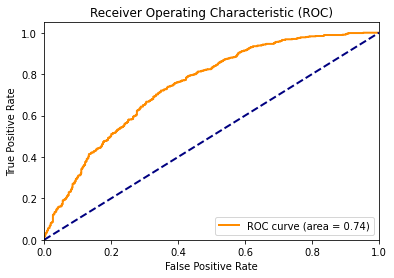

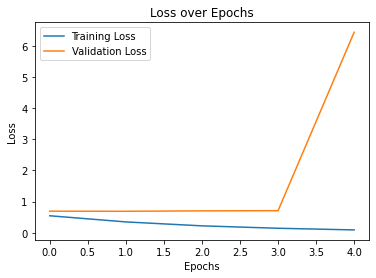

Accuracy: 0.49356913183279744
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
Confusion Matrix:
[[614   0]
 [630   0]]
Cohen's Kappa: 0.0
Matthews Correlation: 0.0
Balanced Accuracy: 0.5
True Positives: 0
True Negatives: 614
False Positives: 0
False Negatives: 630
39/39 ━━━━━━━━━━━━━━━━━━━━ 9s 218ms/step - accuracy: 0.4664 - loss: 0.6928
Test Accuracy: 49.36%
Test Loss: 69.15%
Execution time: 799.7503163814545
Metrics appended to metrics.csv file.


In [5]:
import numpy as np
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D,Flatten
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, precision_score, recall_score, f1_score, accuracy_score
from tensorflow.keras.callbacks import EarlyStopping
import cv2
import time
import matplotlib.pyplot as plt
from sklearn.metrics import cohen_kappa_score, matthews_corrcoef, balanced_accuracy_score
from tensorflow.keras.applications import ResNet50
# Start time
start_time = time.time()

# Assume X_train and y_train are the original splits

# Assuming you have X_train, X_test, y_train, and y_test
# Modify the data shapes based on the model requirements
X_train_resized = np.array([cv2.resize(img, (150, 150)) for img in X_train])
X_train_resized = np.repeat(X_train_resized[..., np.newaxis], 3, -1)
X_valid_resized = np.array([cv2.resize(img, (150, 150)) for img in X_valid])
X_valid_resized = np.repeat(X_valid_resized[..., np.newaxis], 3, -1)
# Example: Assuming X_test is another dataset
X_test_resized = np.array([cv2.resize(img, (150, 150)) for img in X_test])
X_test_resized = np.repeat(X_test_resized[..., np.newaxis], 3, -1)

# Load pre-trained ResNet50 model without top layer
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

# Add a new output layer for binary classification
x = GlobalAveragePooling2D()(base_model.output)

# Flatten the output
x = Flatten()(x)

# Add a new convolutional layer
x = Dense(64, activation='relu')(x)

# New output layer
output = Dense(1, activation='sigmoid')(x)

# Create a new model
model_resnet50 = Model(inputs=base_model.input, outputs=output)

# Compile the model with binary cross-entropy loss
model_resnet50.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# Summary
model_resnet50.summary()

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Train the model with early stopping and 5 epochs
history = model_resnet50.fit(X_train_resized, y_train, epochs=75,batch_size=32 ,validation_data=(X_valid_resized, y_valid), callbacks=[early_stopping])

# Predict probabilities for test labels
predicted_probabilities = model_resnet50.predict(X_test_resized)

# Convert probabilities to classes (0 or 1)
predicted_labels = (predicted_probabilities > 0.5).astype(int)

# Calculate metrics
accuracy = accuracy_score(y_test, predicted_labels)
precision = precision_score(y_test, predicted_labels)
recall = recall_score(y_test, predicted_labels)
f1 = f1_score(y_test, predicted_labels)
conf_matrix = confusion_matrix(y_test, predicted_labels)


# Calculate additional metrics
kappa = cohen_kappa_score(y_test, predicted_labels)
mcc = matthews_corrcoef(y_test, predicted_labels)
balanced_accuracy = balanced_accuracy_score(y_test, predicted_labels)

# True Positives, True Negatives, False Positives, False Negatives
tn, fp, fn, tp = confusion_matrix(y_test, predicted_labels).ravel()

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, predicted_probabilities)
roc_auc = auc(fpr, tpr)


# Plot ROC Curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

# Plot loss and epochs
plt.figure()
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss over Epochs')
plt.legend()
plt.show()

# Print Metrics
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print('Confusion Matrix:')
print(conf_matrix)
print(f"Cohen's Kappa: {kappa}")
print(f"Matthews Correlation: {mcc}")
print(f"Balanced Accuracy: {balanced_accuracy}")
print(f"True Positives: {tp}")
print(f"True Negatives: {tn}")
print(f"False Positives: {fp}")
print(f"False Negatives: {fn}")

# Evaluate the model
test_loss, test_accuracy = model_resnet50.evaluate(X_test_resized, y_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')
print(f'Test Loss: {test_loss * 100:.2f}%')

# Measure the end time
end_time = time.time()
execution_time = end_time - start_time

print("Execution time:", execution_time)

# Load the existing metrics.csv file into a DataFrame
existing_metrics_df = pd.read_csv('ResNet_Final_epoch_75_metrics.csv')
# Create a DataFrame with the new metrics and execution time
new_metrics_dict = {
    'Combination': ['2'],
    'Accuracy': [accuracy],
    'Precision': [precision],
    'Recall': [recall],
    'F1 Score': [f1],
    'Test Accuracy': [test_accuracy * 100],
    'Test Loss': [test_loss * 100],
    'Validation Accuracy': history.history['val_accuracy'][-1],
    'Validation Loss': history.history['val_loss'][-1],
    'Cohen\'s Kappa': [kappa],
    'Matthews Correlation': [mcc],
    'Balanced Accuracy': [balanced_accuracy],
    'True Positives': [tp],
    'True Negatives': [tn],
    'False Positives': [fp],
    'False Negatives': [fn],
    'Execution Time (s)': [execution_time]
}

new_metrics_df = pd.DataFrame(new_metrics_dict)

# Concatenate the existing DataFrame with the new DataFrame
updated_metrics_df = pd.concat([existing_metrics_df, new_metrics_df], ignore_index=True)

# Save the updated DataFrame back to the CSV file
updated_metrics_df.to_csv('ResNet_Final_epoch_75_metrics.csv', index=False)

print("Metrics appended to metrics.csv file.")

# Base Model + residual block

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 150, 150,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 156, 156,  │          0 │ input_layer_2[0]… │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 75, 75,    │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 75, 75,    │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 75, 75,    │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 77, 77,    │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 38, 38,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 38, 38,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 38, 38,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 38, 38,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 38, 38,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 38, 38,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 38, 38,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 38, 38,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 38, 38,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 38, 38,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 38, 38,    │      1,024 │ conv2_block1_3_c

 Total params: 25,093,889 (95.73 MB)

 Trainable params: 25,039,617 (95.52 MB)

 Non-trainable params: 54,272 (212.00 KB)

Epoch 1/75
140/140 ━━━━━━━━━━━━━━━━━━━━ 170s 1s/step - accuracy: 0.6175 - loss: 0.6752 - val_accuracy: 0.5181 - val_loss: 0.7477
Epoch 2/75
140/140 ━━━━━━━━━━━━━━━━━━━━ 156s 1s/step - accuracy: 0.7021 - loss: 0.5733 - val_accuracy: 0.5181 - val_loss: 6.8518
Epoch 3/75
140/140 ━━━━━━━━━━━━━━━━━━━━ 157s 1s/step - accuracy: 0.8143 - loss: 0.4249 - val_accuracy: 0.4819 - val_loss: 1.4364
Epoch 4/75
140/140 ━━━━━━━━━━━━━━━━━━━━ 157s 1s/step - accuracy: 0.8852 - loss: 0.2749 - val_accuracy: 0.5181 - val_loss: 21.1483
Epoch 4: early stopping
Restoring model weights from the end of the best epoch: 1.
39/39 ━━━━━━━━━━━━━━━━━━━━ 10s 235ms/step


/home/lab5/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


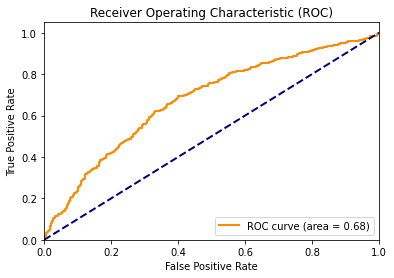

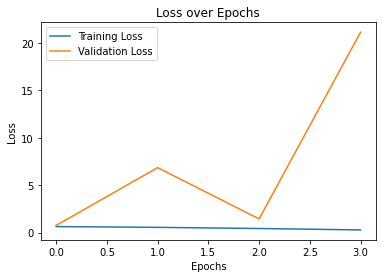

Accuracy: 0.49356913183279744
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
Confusion Matrix:
[[614   0]
 [630   0]]
Cohen's Kappa: 0.0
Matthews Correlation: 0.0
Balanced Accuracy: 0.5
True Positives: 0
True Negatives: 614
False Positives: 0
False Negatives: 630
39/39 ━━━━━━━━━━━━━━━━━━━━ 9s 220ms/step - accuracy: 0.4664 - loss: 0.7859
Test Accuracy: 49.36%
Test Loss: 76.50%
Execution time: 660.1941876411438
Metrics appended to metrics.csv file.


In [6]:
import numpy as np
import cv2
import time
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Reshape, Conv2D, Flatten, BatchNormalization, Activation, Add
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import cohen_kappa_score, matthews_corrcoef, balanced_accuracy_score
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
# Start time
start_time = time.time()

# Assume X_train and y_train are the original splits

# Assuming you have X_train, X_test, y_train, and y_test
# Modify the data shapes based on the model requirements
X_train_resized = np.array([cv2.resize(img, (150, 150)) for img in X_train])
X_train_resized = np.repeat(X_train_resized[..., np.newaxis], 3, -1)
X_valid_resized = np.array([cv2.resize(img, (150, 150)) for img in X_valid])
X_valid_resized = np.repeat(X_valid_resized[..., np.newaxis], 3, -1)
# Example: Assuming X_test is another dataset
X_test_resized = np.array([cv2.resize(img, (150, 150)) for img in X_test])
X_test_resized = np.repeat(X_test_resized[..., np.newaxis], 3, -1)

# Load pre-trained ResNet50 model without top layer
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

# Add a new output layer for binary classification
x = GlobalAveragePooling2D()(base_model.output)

# Reshape the output of GlobalAveragePooling2D layer to a 4D tensor
x = Reshape((1, 1, -1))(x)

# Define residual block
def residual_block(input_tensor, filters):
    x = Conv2D(filters, (3, 3), padding='same')(input_tensor)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    
    x = Conv2D(filters, (3, 3), padding='same')(x)
    x = BatchNormalization()(x)
    
    shortcut = Conv2D(filters, (1, 1))(input_tensor)
    shortcut = BatchNormalization()(shortcut)
    
    x = Add()([x, shortcut])
    x = Activation('relu')(x)
    return x

# Add residual blocks
num_blocks = 3  # Number of residual blocks
for _ in range(num_blocks):
    x = residual_block(x, 64)  # You can adjust the number of filters as needed

# Flatten the output before the final dense layer
x = Flatten()(x)

# New output layer
output = Dense(1, activation='sigmoid')(x)

# Create a new model
model_resnet50 = Model(inputs=base_model.input, outputs=output)

# Compile the model
model_resnet50.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# Summary
model_resnet50.summary()

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Train the model with early stopping and 5 epochs
history = model_resnet50.fit(X_train_resized, y_train, epochs=75,batch_size=32 ,validation_data=(X_valid_resized, y_valid), callbacks=[early_stopping])

# Predict probabilities for test labels
predicted_probabilities = model_resnet50.predict(X_test_resized)

# Convert probabilities to classes (0 or 1)
predicted_labels = (predicted_probabilities > 0.5).astype(int)

# Calculate metrics
accuracy = accuracy_score(y_test, predicted_labels)
precision = precision_score(y_test, predicted_labels)
recall = recall_score(y_test, predicted_labels)
f1 = f1_score(y_test, predicted_labels)
conf_matrix = confusion_matrix(y_test, predicted_labels)


# Calculate additional metrics
kappa = cohen_kappa_score(y_test, predicted_labels)
mcc = matthews_corrcoef(y_test, predicted_labels)
balanced_accuracy = balanced_accuracy_score(y_test, predicted_labels)

# True Positives, True Negatives, False Positives, False Negatives
tn, fp, fn, tp = confusion_matrix(y_test, predicted_labels).ravel()

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, predicted_probabilities)
roc_auc = auc(fpr, tpr)


# Plot ROC Curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

# Plot loss and epochs
plt.figure()
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss over Epochs')
plt.legend()
plt.show()

# Print Metrics
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print('Confusion Matrix:')
print(conf_matrix)
print(f"Cohen's Kappa: {kappa}")
print(f"Matthews Correlation: {mcc}")
print(f"Balanced Accuracy: {balanced_accuracy}")
print(f"True Positives: {tp}")
print(f"True Negatives: {tn}")
print(f"False Positives: {fp}")
print(f"False Negatives: {fn}")

# Evaluate the model
test_loss, test_accuracy = model_resnet50.evaluate(X_test_resized, y_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')
print(f'Test Loss: {test_loss * 100:.2f}%')

# Measure the end time
end_time = time.time()
execution_time = end_time - start_time

print("Execution time:", execution_time)

# Load the existing metrics.csv file into a DataFrame
existing_metrics_df = pd.read_csv('ResNet_Final_epoch_75_metrics.csv')
# Create a DataFrame with the new metrics and execution time
new_metrics_dict = {
    'Combination': ['3'],
    'Accuracy': [accuracy],
    'Precision': [precision],
    'Recall': [recall],
    'F1 Score': [f1],
    'Test Accuracy': [test_accuracy * 100],
    'Test Loss': [test_loss * 100],
    'Validation Accuracy': history.history['val_accuracy'][-1],
    'Validation Loss': history.history['val_loss'][-1],
    'Cohen\'s Kappa': [kappa],
    'Matthews Correlation': [mcc],
    'Balanced Accuracy': [balanced_accuracy],
    'True Positives': [tp],
    'True Negatives': [tn],
    'False Positives': [fp],
    'False Negatives': [fn],
    'Execution Time (s)': [execution_time]
}

new_metrics_df = pd.DataFrame(new_metrics_dict)

# Concatenate the existing DataFrame with the new DataFrame
updated_metrics_df = pd.concat([existing_metrics_df, new_metrics_df], ignore_index=True)

# Save the updated DataFrame back to the CSV file
updated_metrics_df.to_csv('ResNet_Final_epoch_75_metrics.csv', index=False)

print("Metrics appended to metrics.csv file.")

# Base Model + conv2D + residual block

Model: "functional_7"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3       │ (None, 150, 150,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 156, 156,  │          0 │ input_layer_3[0]… │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 75, 75,    │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 75, 75,    │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 75, 75,    │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 77, 77,    │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 38, 38,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 38, 38,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 38, 38,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 38, 38,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 38, 38,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 38, 38,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 38, 38,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 38, 38,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 38, 38,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 38, 38,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 38, 38,    │      1,024 │ conv2_block1_3_c

 Total params: 25,093,889 (95.73 MB)

 Trainable params: 25,039,617 (95.52 MB)

 Non-trainable params: 54,272 (212.00 KB)

Epoch 1/75
140/140 ━━━━━━━━━━━━━━━━━━━━ 169s 1s/step - accuracy: 0.6853 - loss: 0.5964 - val_accuracy: 0.5181 - val_loss: 33.6159
Epoch 2/75
140/140 ━━━━━━━━━━━━━━━━━━━━ 156s 1s/step - accuracy: 0.7989 - loss: 0.4388 - val_accuracy: 0.5181 - val_loss: 364.5139
Epoch 3/75
140/140 ━━━━━━━━━━━━━━━━━━━━ 156s 1s/step - accuracy: 0.8981 - loss: 0.2505 - val_accuracy: 0.4819 - val_loss: 1.5904
Epoch 4/75
140/140 ━━━━━━━━━━━━━━━━━━━━ 156s 1s/step - accuracy: 0.9431 - loss: 0.1552 - val_accuracy: 0.4819 - val_loss: 2.1525
Epoch 5/75
140/140 ━━━━━━━━━━━━━━━━━━━━ 156s 1s/step - accuracy: 0.9659 - loss: 0.0975 - val_accuracy: 0.4819 - val_loss: 2.9353
Epoch 6/75
140/140 ━━━━━━━━━━━━━━━━━━━━ 156s 1s/step - accuracy: 0.9679 - loss: 0.0841 - val_accuracy: 0.7349 - val_loss: 0.8248
Epoch 7/75
140/140 ━━━━━━━━━━━━━━━━━━━━ 156s 1s/step - accuracy: 0.9840 - loss: 0.0481 - val_accuracy: 0.5442 - val_loss: 3.1007
Epoch 8/75
140/140 ━━━━━━━━━━━━━━━━━━━━ 155s 1s/step - accuracy: 0.9805 - loss: 0.0529 - val_a

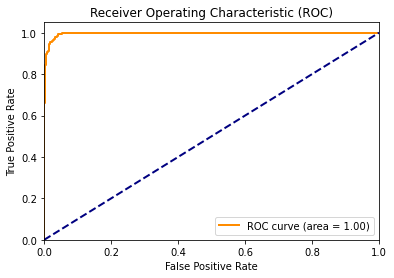

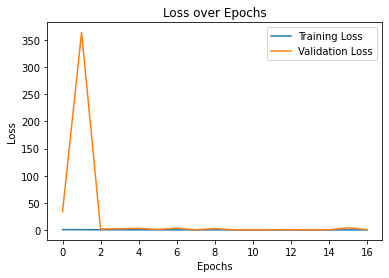

Accuracy: 0.9533762057877814
Precision: 0.9863945578231292
Recall: 0.9206349206349206
F1 Score: 0.9523809523809523
Confusion Matrix:
[[606   8]
 [ 50 580]]
Cohen's Kappa: 0.9068179235243674
Matthews Correlation: 0.9088894171715286
Balanced Accuracy: 0.9538028023370042
True Positives: 580
True Negatives: 606
False Positives: 8
False Negatives: 50
39/39 ━━━━━━━━━━━━━━━━━━━━ 9s 222ms/step - accuracy: 0.9589 - loss: 0.1162
Test Accuracy: 95.34%
Test Loss: 12.13%
Execution time: 2678.8738174438477
Metrics appended to metrics.csv file.


In [7]:
import numpy as np
import cv2
import time
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Conv2D, BatchNormalization, Activation, Add
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import cohen_kappa_score, matthews_corrcoef, balanced_accuracy_score
import matplotlib.pyplot as plt
import pandas as pd
# Start time
start_time = time.time()

# Load pre-trained ResNet50 model without top layer
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

# Define residual block
def residual_block(input_tensor, filters):
    x = Conv2D(filters, (3, 3), padding='same')(input_tensor)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    
    x = Conv2D(filters, (3, 3), padding='same')(x)
    x = BatchNormalization()(x)
    
    shortcut = Conv2D(filters, (1, 1))(input_tensor)
    shortcut = BatchNormalization()(shortcut)
    
    x = Add()([x, shortcut])
    x = Activation('relu')(x)
    return x

# Add a convolutional layer
x = base_model.output

# Add residual blocks
num_blocks = 3  # You can adjust the number of residual blocks as needed
for _ in range(num_blocks):
    x = residual_block(x, 64)

# New output layer
x = GlobalAveragePooling2D()(x)
output = Dense(1, activation='sigmoid')(x)

# Create a new model
model = Model(inputs=base_model.input, outputs=output)

# Compile the model
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# Summary
model.summary()

# Assume X_train, X_test, y_train, y_test are the original splits
# Assuming you have X_train, X_test, y_train, and y_test
# Modify the data shapes based on the model requirements
X_train_resized = np.array([cv2.resize(img, (150, 150)) for img in X_train])
X_train_resized = np.repeat(X_train_resized[..., np.newaxis], 3, -1)
X_valid_resized = np.array([cv2.resize(img, (150, 150)) for img in X_valid])
X_valid_resized = np.repeat(X_valid_resized[..., np.newaxis], 3, -1)
# Example: Assuming X_test is another dataset
X_test_resized = np.array([cv2.resize(img, (150, 150)) for img in X_test])
X_test_resized = np.repeat(X_test_resized[..., np.newaxis], 3, -1)

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Train the model
history = model.fit(X_train_resized, y_train, epochs=75,batch_size=32 ,validation_data=(X_valid_resized, y_valid), callbacks=[early_stopping])





# Predict probabilities for test labels
predicted_probabilities = model.predict(X_test_resized)

# Convert probabilities to classes (0 or 1)
predicted_labels = (predicted_probabilities > 0.5).astype(int)

# Calculate metrics
accuracy = accuracy_score(y_test, predicted_labels)
precision = precision_score(y_test, predicted_labels)
recall = recall_score(y_test, predicted_labels)
f1 = f1_score(y_test, predicted_labels)
conf_matrix = confusion_matrix(y_test, predicted_labels)


# Calculate additional metrics
kappa = cohen_kappa_score(y_test, predicted_labels)
mcc = matthews_corrcoef(y_test, predicted_labels)
balanced_accuracy = balanced_accuracy_score(y_test, predicted_labels)

# True Positives, True Negatives, False Positives, False Negatives
tn, fp, fn, tp = confusion_matrix(y_test, predicted_labels).ravel()

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, predicted_probabilities)
roc_auc = auc(fpr, tpr)


# Plot ROC Curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

# Plot loss and epochs
plt.figure()
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss over Epochs')
plt.legend()
plt.show()

# Print Metrics
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print('Confusion Matrix:')
print(conf_matrix)
print(f"Cohen's Kappa: {kappa}")
print(f"Matthews Correlation: {mcc}")
print(f"Balanced Accuracy: {balanced_accuracy}")
print(f"True Positives: {tp}")
print(f"True Negatives: {tn}")
print(f"False Positives: {fp}")
print(f"False Negatives: {fn}")

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test_resized, y_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')
print(f'Test Loss: {test_loss * 100:.2f}%')

# Measure the end time
end_time = time.time()
execution_time = end_time - start_time

print("Execution time:", execution_time)

# Load the existing metrics.csv file into a DataFrame
existing_metrics_df = pd.read_csv('ResNet_Final_epoch_75_metrics.csv')
# Create a DataFrame with the new metrics and execution time
new_metrics_dict = {
    'Combination': ['4'],
    'Accuracy': [accuracy],
    'Precision': [precision],
    'Recall': [recall],
    'F1 Score': [f1],
    'Test Accuracy': [test_accuracy * 100],
    'Test Loss': [test_loss * 100],
    'Validation Accuracy': history.history['val_accuracy'][-1],
    'Validation Loss': history.history['val_loss'][-1],
    'Cohen\'s Kappa': [kappa],
    'Matthews Correlation': [mcc],
    'Balanced Accuracy': [balanced_accuracy],
    'True Positives': [tp],
    'True Negatives': [tn],
    'False Positives': [fp],
    'False Negatives': [fn],
    'Execution Time (s)': [execution_time]
}

new_metrics_df = pd.DataFrame(new_metrics_dict)

# Concatenate the existing DataFrame with the new DataFrame
updated_metrics_df = pd.concat([existing_metrics_df, new_metrics_df], ignore_index=True)

# Save the updated DataFrame back to the CSV file
updated_metrics_df.to_csv('ResNet_Final_epoch_75_metrics.csv', index=False)

print("Metrics appended to metrics.csv file.")

# Base Model + conv2D + identical block

In [ ]:
####identical block + conv2D


import numpy as np
import cv2
import time
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Conv2D, BatchNormalization, Activation, Add
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import cohen_kappa_score, matthews_corrcoef, balanced_accuracy_score
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Reshape
import pandas as pd

# Start time
start_time = time.time()

# Load pre-trained ResNet50 model without top layer
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

# Add a new output layer for binary classification
x = GlobalAveragePooling2D()(base_model.output)
x = Reshape((1, 1, 2048))(x)
# Add a convolutional layer
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)

# Define identity block
def identity_block(input_tensor, filters):
    x = Conv2D(filters, (3, 3), padding='same')(input_tensor)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    
    x = Conv2D(filters, (3, 3), padding='same')(x)
    x = BatchNormalization()(x)
    
    x = Add()([x, input_tensor])  # Identity mapping
    x = Activation('relu')(x)
    return x

# Add an identity block
x = identity_block(x, 64)

# Final convolutional layer before classification
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)

# Flatten the output
x = GlobalAveragePooling2D()(x)

# Final output layer
output = Dense(1, activation='sigmoid')(x)

# Create a new model
model = Model(inputs=base_model.input, outputs=output)

# Compile the model
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# Summary
model.summary()


# Assume X_train, X_test, y_train, y_test are the original splits

# Assume X_train, X_test, y_train, y_test are the original splits
# Assuming you have X_train, X_test, y_train, and y_test
# Modify the data shapes based on the model requirements
X_train_resized = np.array([cv2.resize(img, (150, 150)) for img in X_train])
X_train_resized = np.repeat(X_train_resized[..., np.newaxis], 3, -1)
X_valid_resized = np.array([cv2.resize(img, (150, 150)) for img in X_valid])
X_valid_resized = np.repeat(X_valid_resized[..., np.newaxis], 3, -1)
# Example: Assuming X_test is another dataset
X_test_resized = np.array([cv2.resize(img, (150, 150)) for img in X_test])
X_test_resized = np.repeat(X_test_resized[..., np.newaxis], 3, -1)

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Train the model
history = model.fit(X_train_resized, y_train, epochs=75,batch_size=32, validation_data=(X_valid_resized, y_valid), callbacks=[early_stopping])





# Predict probabilities for test labels
predicted_probabilities = model.predict(X_test_resized)

# Convert probabilities to classes (0 or 1)
predicted_labels = (predicted_probabilities > 0.5).astype(int)
# Calculate metrics
accuracy = accuracy_score(y_test, predicted_labels)
precision = precision_score(y_test, predicted_labels)
recall = recall_score(y_test, predicted_labels)
f1 = f1_score(y_test, predicted_labels)
conf_matrix = confusion_matrix(y_test, predicted_labels)


# Calculate additional metrics
kappa = cohen_kappa_score(y_test, predicted_labels)
mcc = matthews_corrcoef(y_test, predicted_labels)
balanced_accuracy = balanced_accuracy_score(y_test, predicted_labels)

# True Positives, True Negatives, False Positives, False Negatives
tn, fp, fn, tp = confusion_matrix(y_test, predicted_labels).ravel()

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, predicted_probabilities)
roc_auc = auc(fpr, tpr)


# Plot ROC Curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

# Plot loss and epochs
plt.figure()
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss over Epochs')
plt.legend()
plt.show()

# Print Metrics
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print('Confusion Matrix:')
print(conf_matrix)
print(f"Cohen's Kappa: {kappa}")
print(f"Matthews Correlation: {mcc}")
print(f"Balanced Accuracy: {balanced_accuracy}")
print(f"True Positives: {tp}")
print(f"True Negatives: {tn}")
print(f"False Positives: {fp}")
print(f"False Negatives: {fn}")

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test_resized, y_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')
print(f'Test Loss: {test_loss * 100:.2f}%')

# Measure the end time
end_time = time.time()
execution_time = end_time - start_time

print("Execution time:", execution_time)

# Load the existing metrics.csv file into a DataFrame
existing_metrics_df = pd.read_csv('ResNet_Final_epoch_75_metrics.csv')
# Create a DataFrame with the new metrics and execution time
new_metrics_dict = {
    'Combination': ['5'],
    'Accuracy': [accuracy],
    'Precision': [precision],
    'Recall': [recall],
    'F1 Score': [f1],
    'Test Accuracy': [test_accuracy * 100],
    'Test Loss': [test_loss * 100],
    'Validation Accuracy': history.history['val_accuracy'][-1],
    'Validation Loss': history.history['val_loss'][-1],
    'Cohen\'s Kappa': [kappa],
    'Matthews Correlation': [mcc],
    'Balanced Accuracy': [balanced_accuracy],
    'True Positives': [tp],
    'True Negatives': [tn],
    'False Positives': [fp],
    'False Negatives': [fn],
    'Execution Time (s)': [execution_time]
}

new_metrics_df = pd.DataFrame(new_metrics_dict)

# Concatenate the existing DataFrame with the new DataFrame
updated_metrics_df = pd.concat([existing_metrics_df, new_metrics_df], ignore_index=True)

# Save the updated DataFrame back to the CSV file
updated_metrics_df.to_csv('ResNet_Final_epoch_75_metrics.csv', index=False)

print("Metrics appended to metrics.csv file.")

Model: "functional_9"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_4       │ (None, 150, 150,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 156, 156,  │          0 │ input_layer_4[0]… │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 75, 75,    │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 75, 75,    │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 75, 75,    │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 77, 77,    │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 38, 38,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 38, 38,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 38, 38,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 38, 38,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 38, 38,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 38, 38,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 38, 38,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 38, 38,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 38, 38,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 38, 38,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 38, 38,    │      1,024 │ conv2_block1_3_c

 Total params: 24,878,785 (94.91 MB)

 Trainable params: 24,825,409 (94.70 MB)

 Non-trainable params: 53,376 (208.50 KB)

Epoch 1/75
140/140 ━━━━━━━━━━━━━━━━━━━━ 167s 1s/step - accuracy: 0.6672 - loss: 0.6023 - val_accuracy: 0.5181 - val_loss: 167.3871
Epoch 2/75
140/140 ━━━━━━━━━━━━━━━━━━━━ 155s 1s/step - accuracy: 0.8260 - loss: 0.3826 - val_accuracy: 0.5181 - val_loss: 0.6925
Epoch 3/75
140/140 ━━━━━━━━━━━━━━━━━━━━ 160s 1s/step - accuracy: 0.9139 - loss: 0.2369 - val_accuracy: 0.5181 - val_loss: 0.6924
Epoch 4/75
140/140 ━━━━━━━━━━━━━━━━━━━━ 157s 1s/step - accuracy: 0.9439 - loss: 0.1508 - val_accuracy: 0.5181 - val_loss: 0.6918
Epoch 5/75
140/140 ━━━━━━━━━━━━━━━━━━━━ 157s 1s/step - accuracy: 0.9582 - loss: 0.0995 - val_accuracy: 0.5181 - val_loss: 4.2347
Epoch 6/75
140/140 ━━━━━━━━━━━━━━━━━━━━ 160s 1s/step - accuracy: 0.9764 - loss: 0.0684 - val_accuracy: 0.5181 - val_loss: 27.8878
Epoch 7/75
 29/140 ━━━━━━━━━━━━━━━━━━━━ 2:02 1s/step - accuracy: 0.9913 - loss: 0.0354